# Condition number of the intercept matrix

the data k_of_intercept_matrices provides condition number of intercept matrices / weight matrices which are created for different variations of experiment geometry. 

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# better quality visualizations
# %config InlineBackend.figure_format = "retina"

In [3]:
condition_nos = pd.read_csv('../data/k_of_intercept_matrices.csv', index_col=0)
condition_nos.head()

,ss,sod,sdd,dd,condition_no
0,5,15,32,0,9.197036e+07
1,5,15,32,1,4.392306e+07
2,5,15,32,2,4.597239e+07
3,5,15,32,3,7.535490e+06
4,5,15,32,4,8.074765e+06


# Analyzing the data

### Distribution of condition numbers

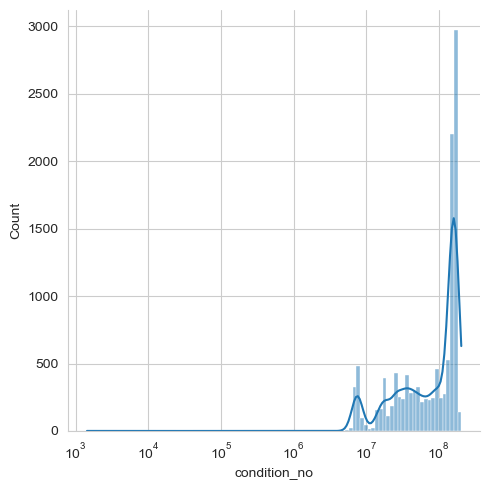

In [6]:
sns.displot(condition_nos, x="condition_no", bins=100, kde=True, log_scale=True);

### See the distribution of various features

In [7]:
# for ss in condition_nos.ss.unique():
#     f, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#     for i, col in enumerate(['sod', 'sdd', 'dd']):
#         axes[i].set_yscale("log")
#         axes[i].set_ylim([1e3, 5e8])
#         
#         sns.violinplot(
#             condition_nos.loc[condition_nos['ss'] == ss], x=col, y="condition_no", ax=axes[i]
#         )
#         axes[i].xaxis.grid(True)
#     
#     plt.suptitle(f'sample size {ss}')

### Relationship between condition number and ss, sod, sdd

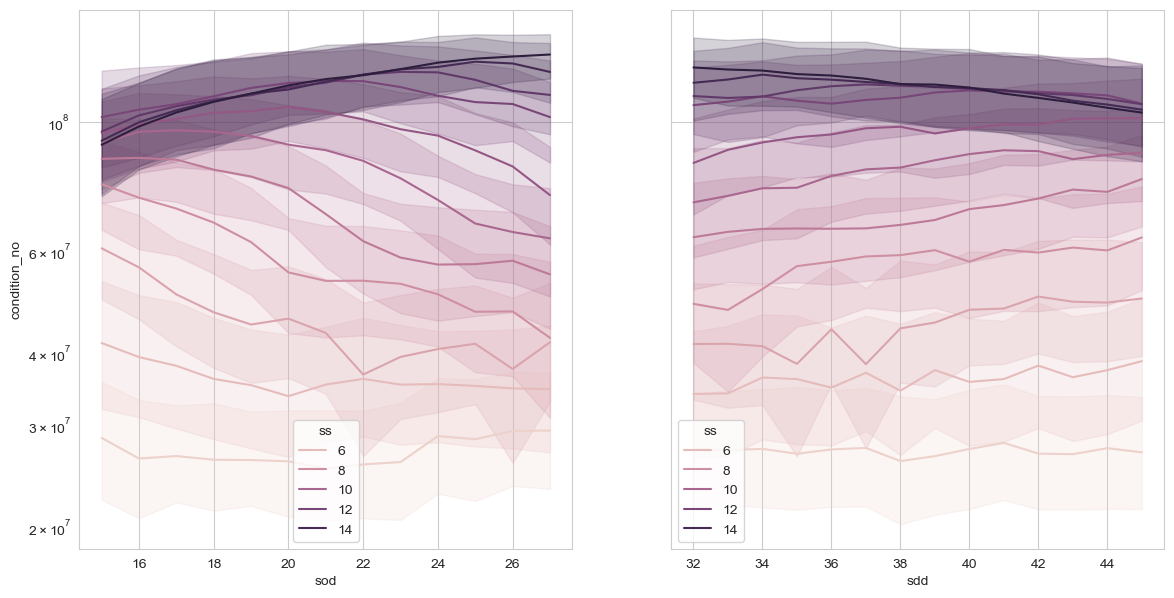

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
for i, col in enumerate(['sod', 'sdd']):
    axes[i].set_yscale("log")
    sns.lineplot(condition_nos, x=col, y='condition_no', hue='ss', ax=axes[i])

### Relationship between condition number and dd, sod, sdd

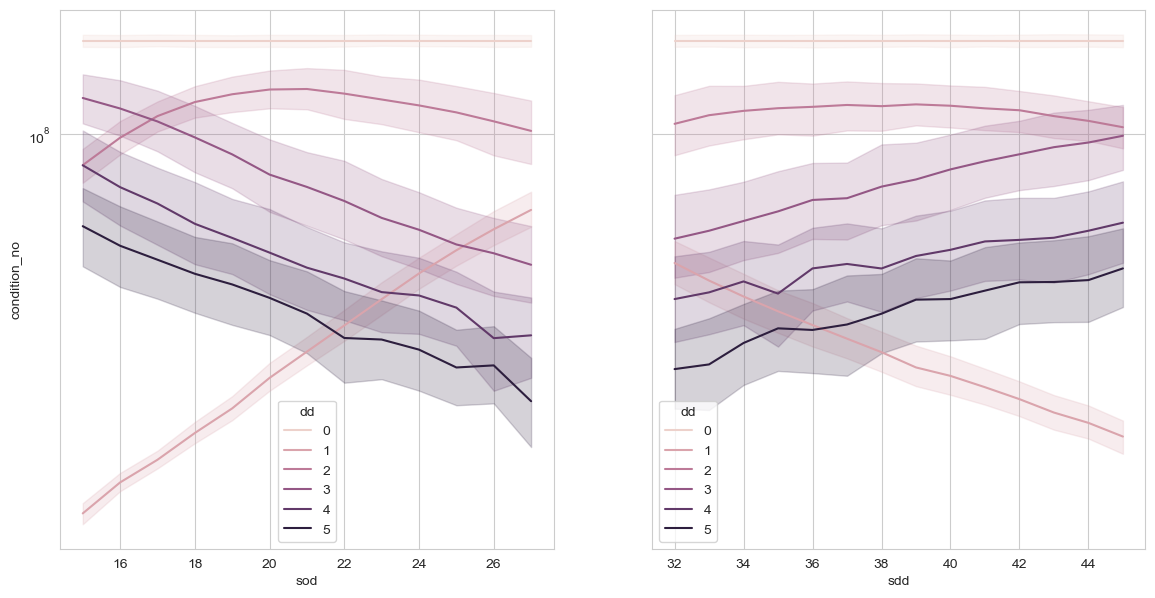

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
for i, col in enumerate(['sod', 'sdd']):
    axes[i].set_yscale("log")
    sns.lineplot(condition_nos, x=col, y='condition_no', hue='dd', ax=axes[i])

### Relationship between condition number and dd, sod, sdd keeping ss constant

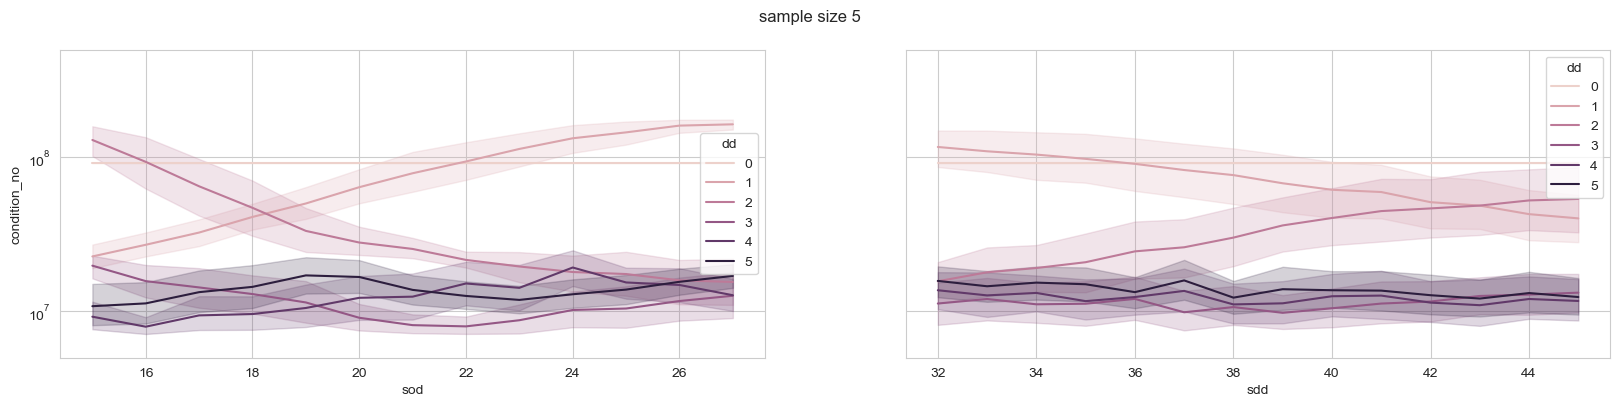

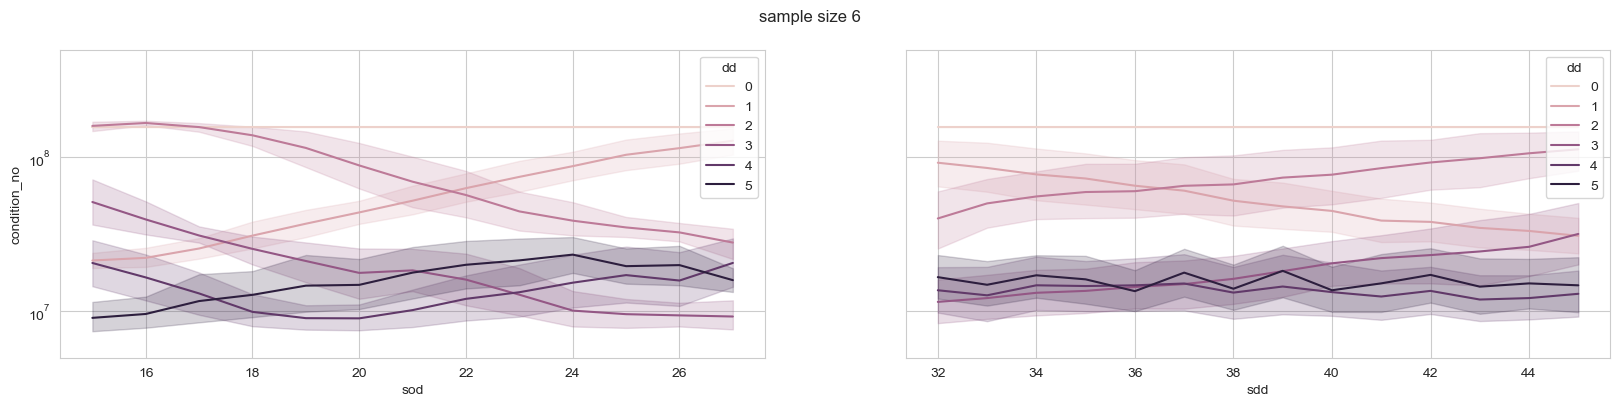

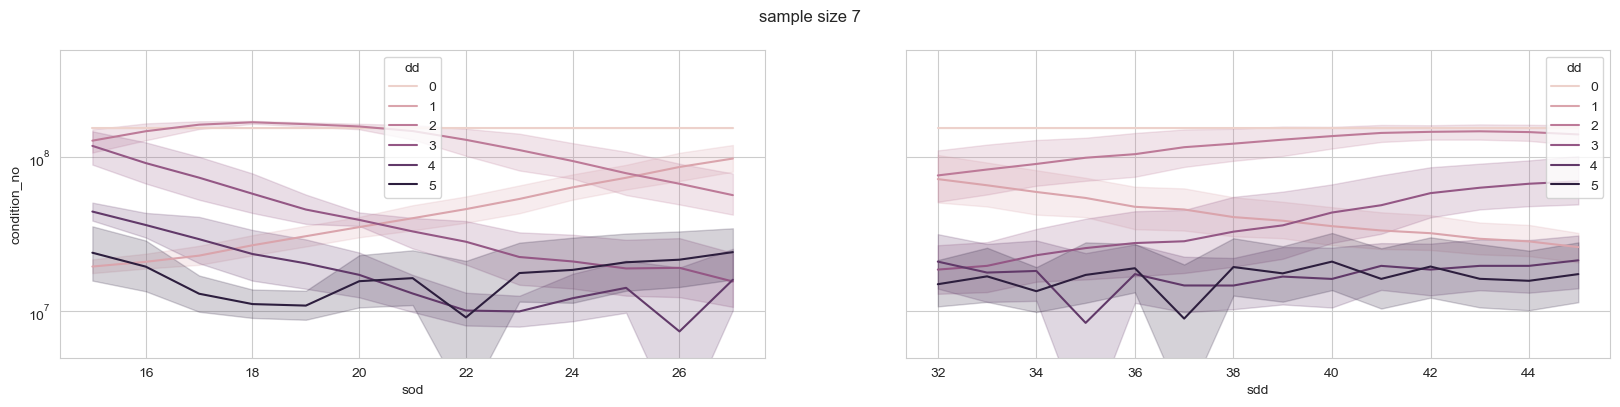

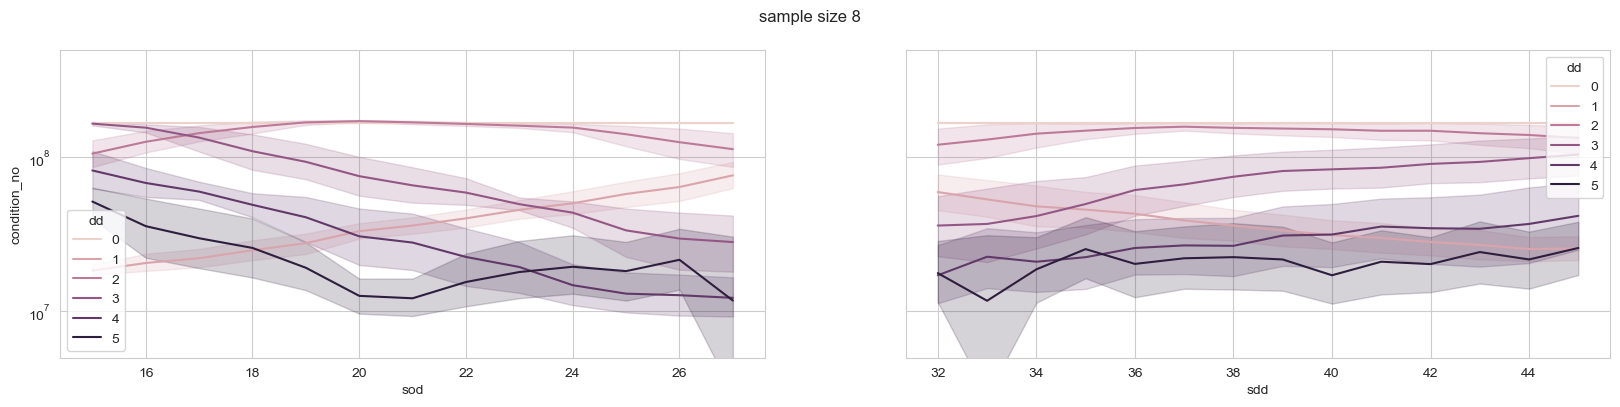

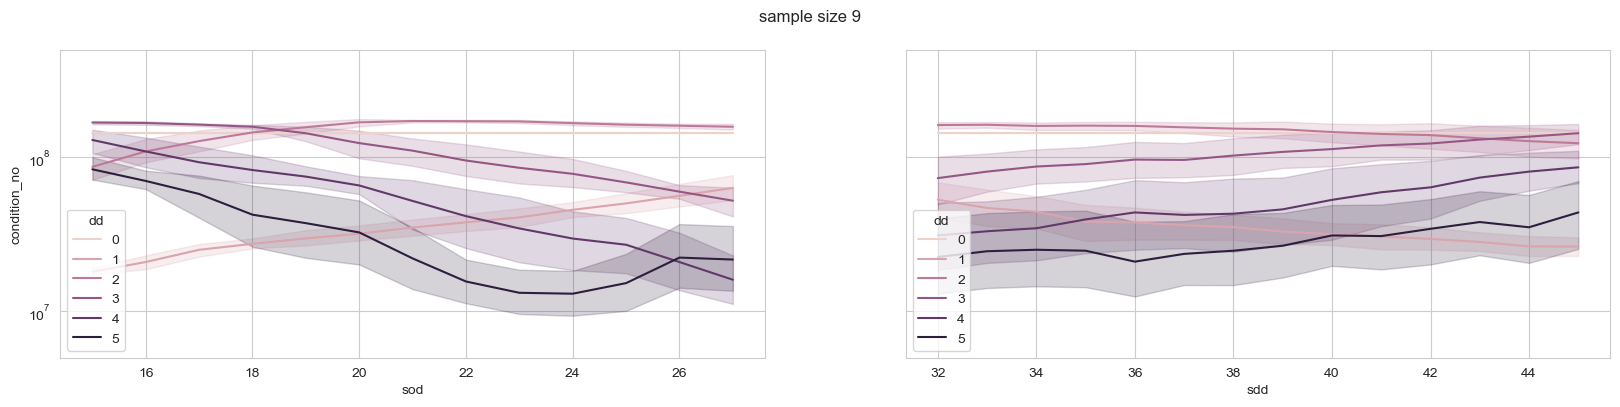

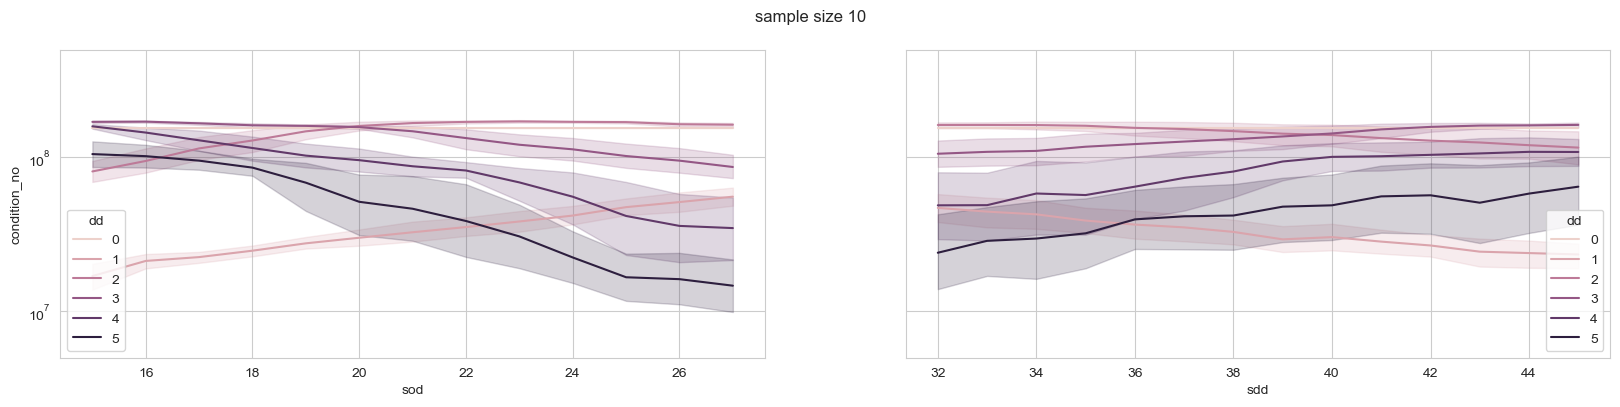

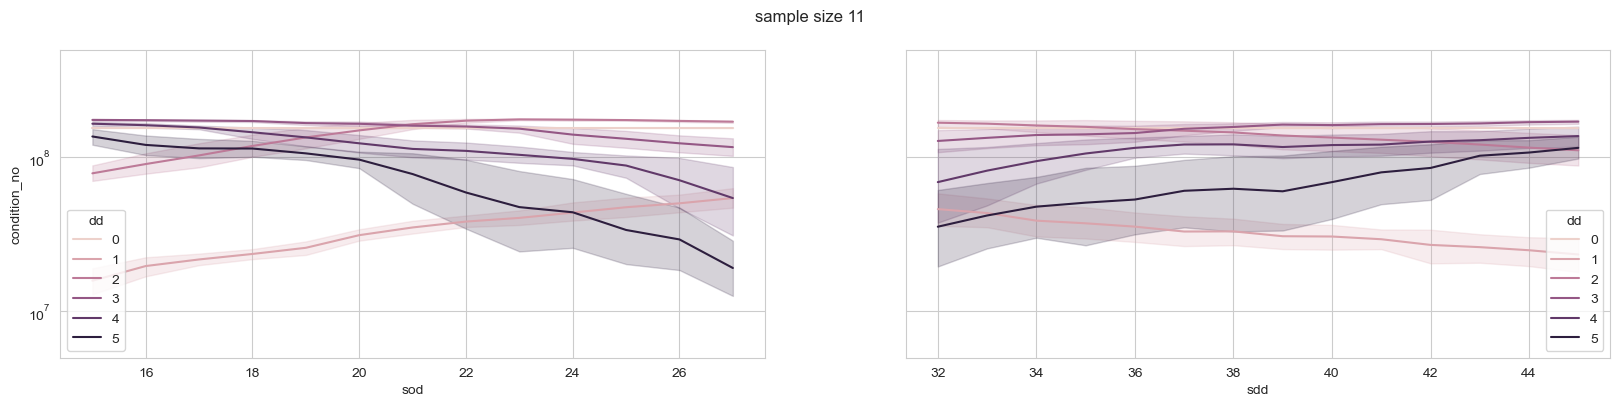

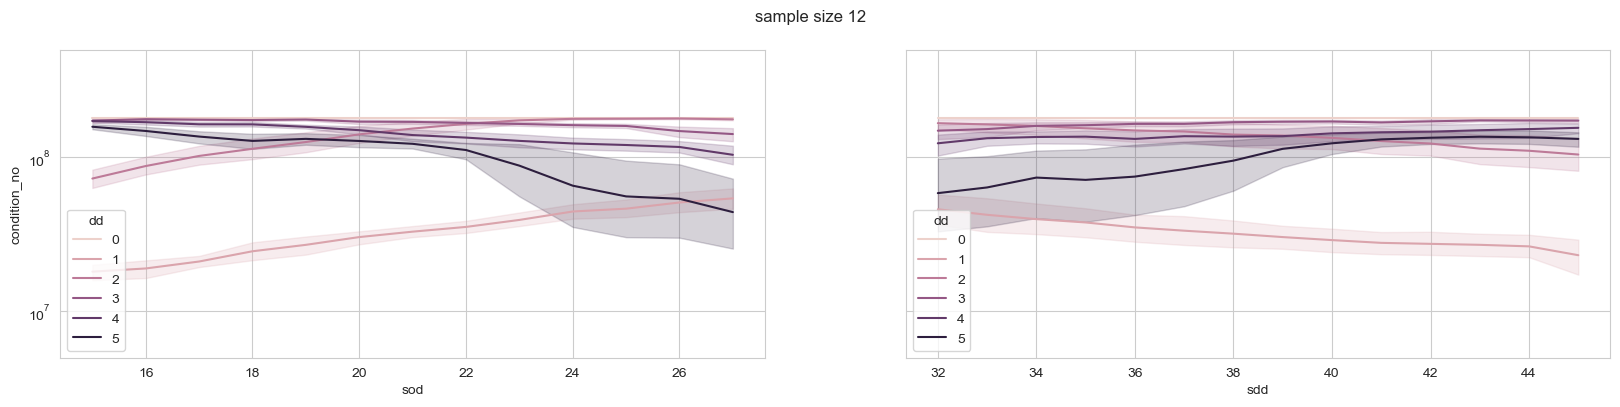

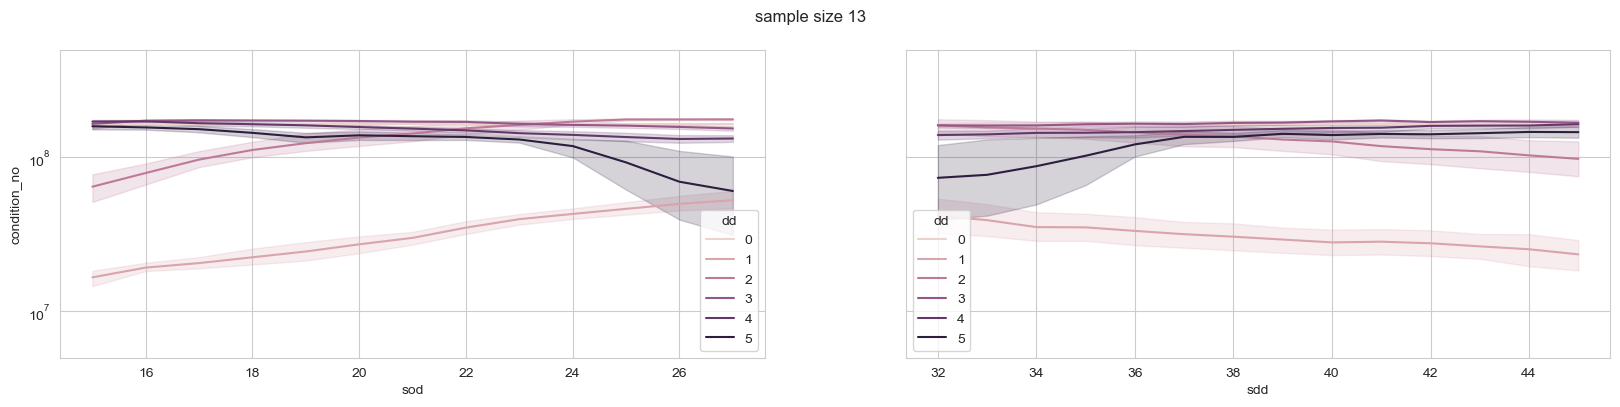

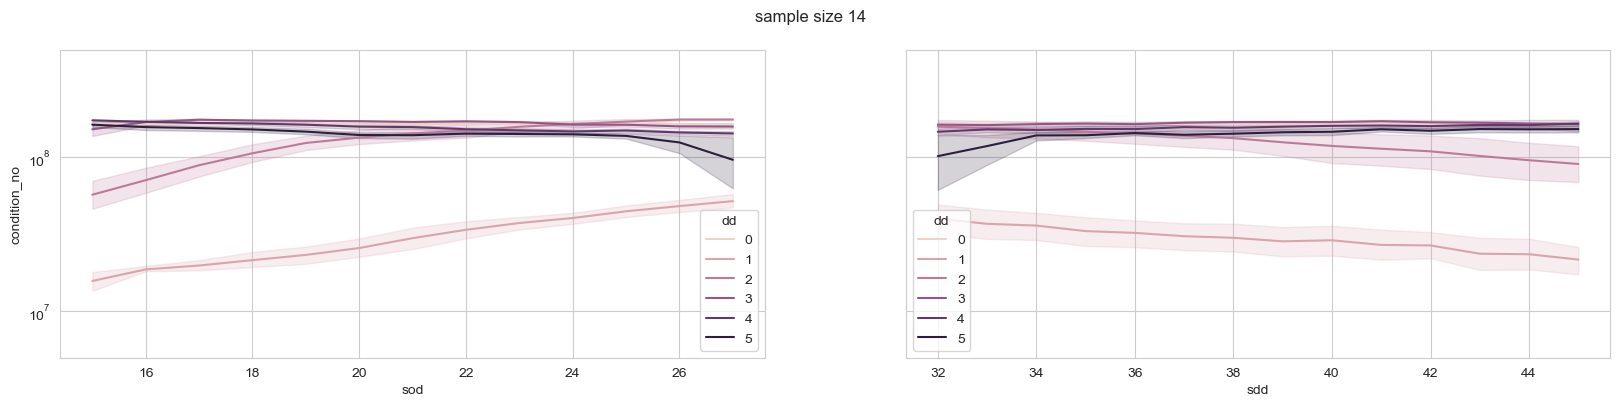

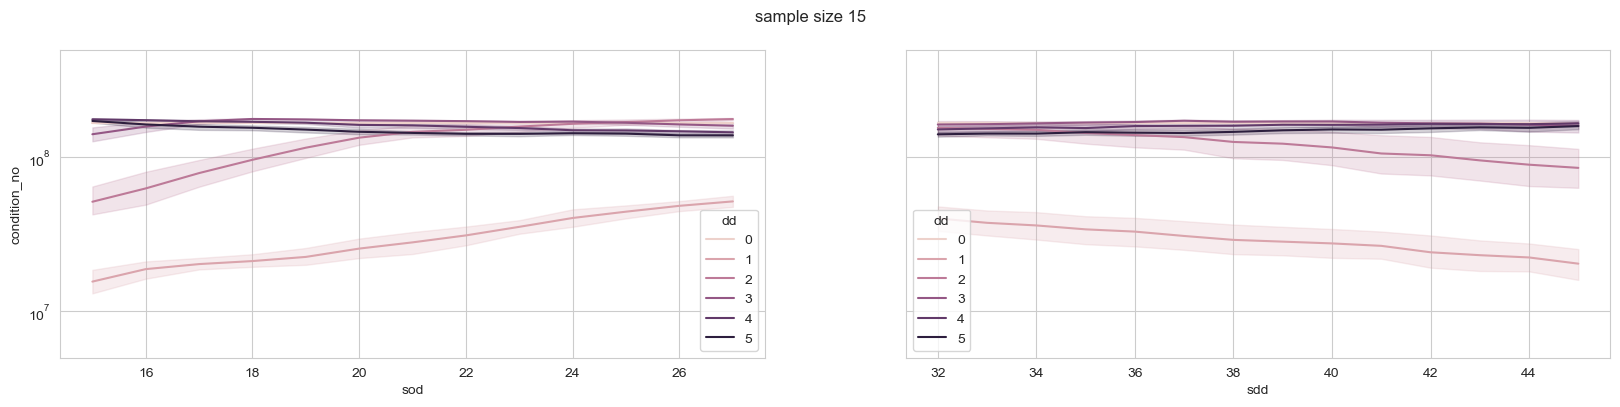

In [10]:
for ss in condition_nos.ss.unique():
    fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
    for i, col in enumerate(['sod', 'sdd']):
        axes[i].set_yscale("log")
        axes[i].set_ylim([5e6, 5e8])
        sns.lineplot(condition_nos.loc[condition_nos['ss'] == ss], x=col, y='condition_no', hue='dd', ax=axes[i])
        plt.suptitle(f'sample size {ss}')

# Polynomial Regression to fit to the data

In [11]:
A = condition_nos.copy()

X = A.drop('condition_no', axis=1)
y = np.log(A.condition_no)
y

0        18.336977
1        17.597950
2        17.643552
3        15.835134
4        15.904254
           ...    
12007    17.391049
12008    18.902411
12009    18.957755
12010    18.736787
12011    18.777670
Name: condition_no, Length: 12012, dtype: float64

### first make polynomial features and then fit a linear regression model

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures

degree = 6

model = make_pipeline(PolynomialFeatures(degree), LinearRegression(fit_intercept=False))  # overfits with 0.38 rmse
# model = make_pipeline(PolynomialFeatures(degree), Lasso(fit_intercept=False, alpha=1))    # L1 Regularization 0.5 rmse
model.fit(X, y);

C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

### RMSE of the model

In [13]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(np.log(condition_nos.condition_no).values, y_pred))
rmse

C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\msing\miniconda3\envs\py311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.40502013224440625

In [14]:
condition_nos['preds'] = np.exp(y_pred)

## Visualizing the predictions

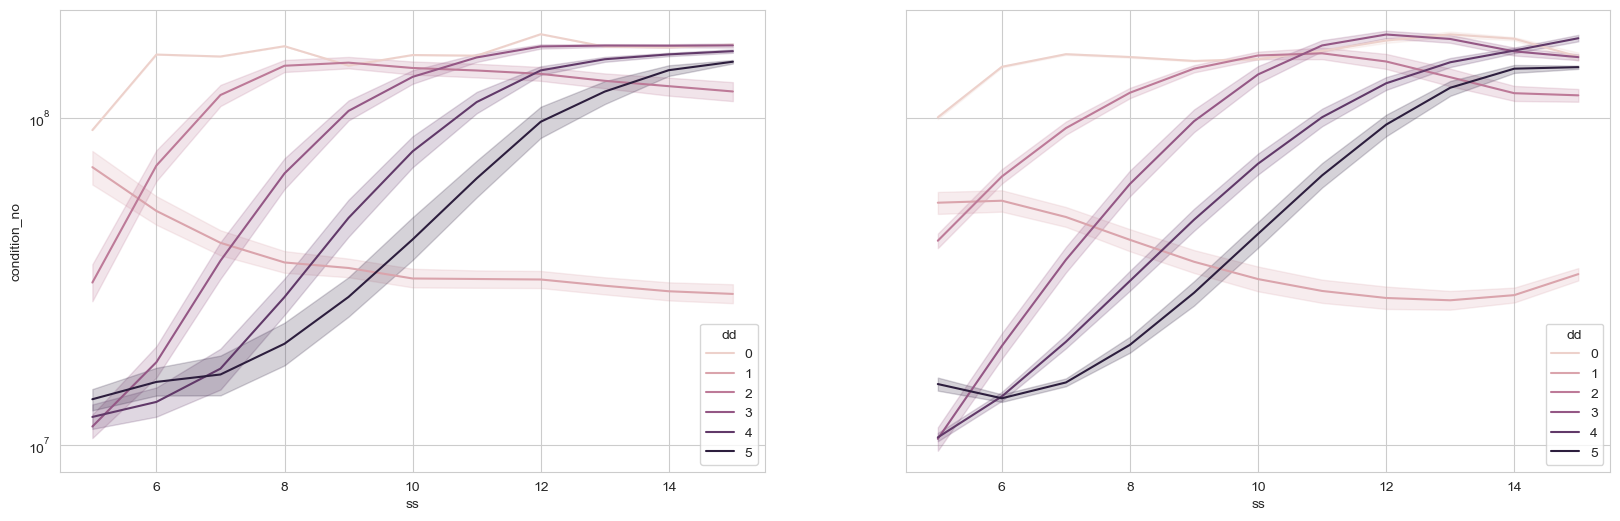

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
plt.yscale('log')

sns.lineplot(condition_nos, x='ss', y='condition_no', hue='dd', ax=axes[0])
sns.lineplot(condition_nos, x='ss', y='preds', hue='dd', ax=axes[1]);

In [16]:
# Visualizing the predictions

# for ss in condition_nos.ss.unique():
#     fig, axes = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
#     for i, col in enumerate(['sod', 'sdd']):
#         axes[i].set_yscale("log")
#         axes[i].set_ylim([5e6, 5e8])
#         sns.lineplot(condition_nos.loc[condition_nos['ss'] == ss], x=col, y='preds', hue='dd', ax=axes[i])
#         plt.suptitle(f'sample size {ss}')